# Pymaceuticals Inc.
---

## Analysis

- Add your analysis here.

### Setup & Clean

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])
study_data_complete = study_data_complete.reindex(columns=[
    "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
    "Drug Regimen", "Sex", "Age_months", "Weight (g)"
])

# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [25]:
# Checking the number of mice.
mouse_id_count = study_data_complete["Mouse ID"].nunique()
mouse_id_count

249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete[study_data_complete.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Drop duplicate mice by ID and Timepoint
clean_study_data = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mice)==False] 
clean_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [28]:
# Display the number of unique mice IDs in the data
clean_study_data["Mouse ID"].nunique()

248

### Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_desc = clean_study_data.copy()

tumor_mean = tumor_desc.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = tumor_desc.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = tumor_desc.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_stdev = tumor_desc.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_stderr = tumor_desc.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# # mean, median, variance, standard deviation, and SEM of the tumor volume. 
# # Assemble the resulting series into a single summary DataFrame.

tumor_desc_by_drug = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                   "Median Tumor Volume": tumor_median,
                                   "Tumor Volume Variance": tumor_variance,
                                   "Tumor Volume Std. Dev.": tumor_stdev, 
                                   "Tumor Volume Std. Err.": tumor_stderr})

tumor_desc_by_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumor_desc_by_drug = clean_study_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

tumor_desc_by_drug

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### Bar & Pie Charts (NB: Circle Back)

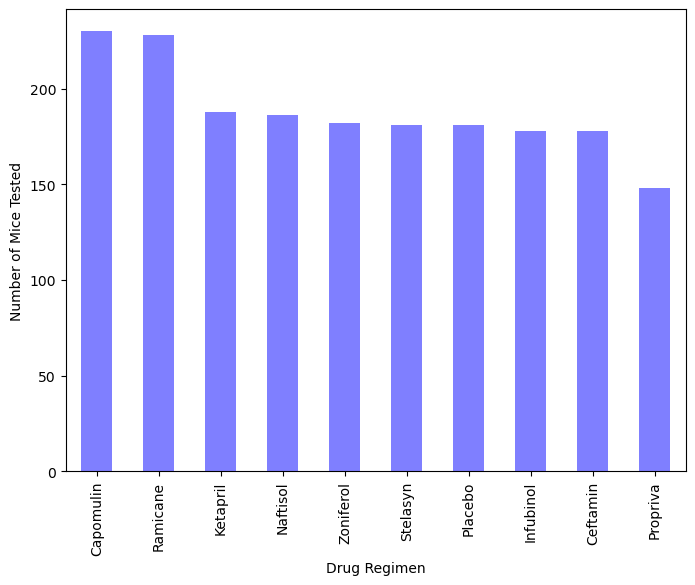

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Group the clean study data by drug regimen and count the number of unique mice
time_counts = clean_study_data['Drug Regimen'].value_counts()

# Sort the regimen_counts data frame in descending order based on the count of mice
sorted_time_counts = time_counts.sort_values(ascending=False)

# Create a bar plot using Pandas with the sorted data frame
ax = sorted_time_counts.plot(kind='bar', color='b', alpha=0.5, figsize=(8,6))

# Set the plot title and axis labels
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Mice Tested")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()



#TIME PERMITTING - FORMAT

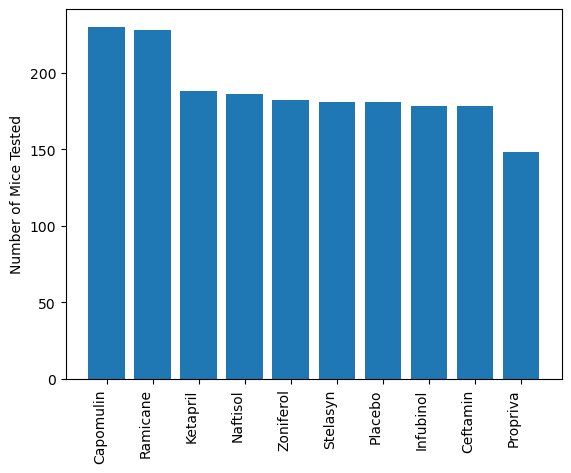

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Group data by drug regimen and count the number of mice
# Sort the data frame by the "Number of Mice Tested" column in descending order
drug_counts = clean_study_data['Drug Regimen'].value_counts().sort_values(ascending=False)

# Create a bar chart using pyplot
fig, ax = plt.subplots()
ax.bar(drug_counts.index, drug_counts.values)

# Set x-axis labels to the drug names
plt.xticks(np.arange(len(drug_counts)), drug_counts.index, rotation=90, ha='right')

# Set y-axis label
ax.set_ylabel('Number of Mice Tested')
plt.show()

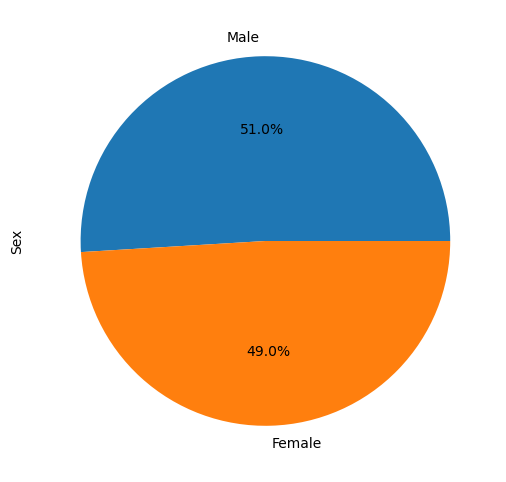

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_study_data['Sex'].value_counts()
ax = pie_data.plot.pie(y='Sex', figsize=(6, 6), autopct='%1.1f%%')
plt.show()

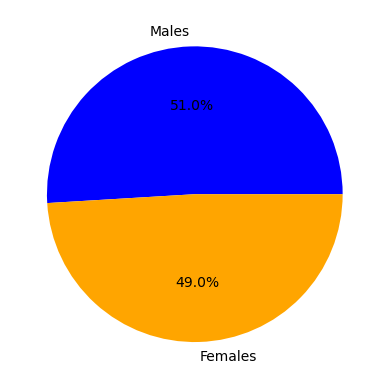

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Males", "Females"]

# The values of each section of the pie chart
sex = clean_study_data['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sex, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.show()



#TIME PERMITTING - FORMAT, Y-AXIS LABEL 

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = clean_study_data.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoints


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [36]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_data_merge = pd.merge(clean_study_data, greatest_timepoints, how="right", on=["Mouse ID", "Mouse ID"]).rename(
                            columns={'Timepoint_x' : 'Timepoints',
                                     'Timepoint_y' : 'Last/Greatest Timepoint'})
# print(clean_data_merge.sample(n=10))

In [37]:
# Group by Mouse ID and get the maximum timepoint for each mouse
max_timepoints = clean_study_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the max_timepoints dataframe with the original dataframe
merged_data = pd.merge(clean_study_data, max_timepoints, on=['Mouse ID', 'Timepoint'])

# Filter the merged_data to get only the tumor volume at the last timepoint
tumor_volume_last_timepoint = merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].rename(
                                           columns={'Timepoint' : 'Last/Greatest Timepoint',
                                                    'Tumor Volume (mm3)' : 'Tumor Volume at Last/Greatest Timepoint (mm3)'})

In [38]:
tumor_volume_last_timepoint

,Mouse ID,Last/Greatest Timepoint,Tumor Volume at Last/Greatest Timepoint (mm3)
0,f932,0,45.000000
1,x336,0,45.000000
2,h428,0,45.000000
3,v199,0,45.000000
4,o848,0,45.000000
...,...,...,...
243,r944,45,41.581521
244,u364,45,31.023923
245,p438,45,61.433892
246,x773,45,58.634971


In [39]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = clean_study_data['Drug Regimen'].unique().tolist()

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = clean_study_data.loc[clean_study_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Check for potential outliers
    potential_outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    # Print potential outliers for each treatment
    print(f"{treatment}'s potential outliers: {potential_outliers}")

    

    
#TIME PERMITTING - FORMAT, MATCH EXAMPLE OUTPUT 

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ketapril's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn's potential outliers: 1830    75.12369
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Zoniferol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: 1705    71.172463
1884    72.455421
Name: Tumor Volume (mm3), dtype: float64
Placebo's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


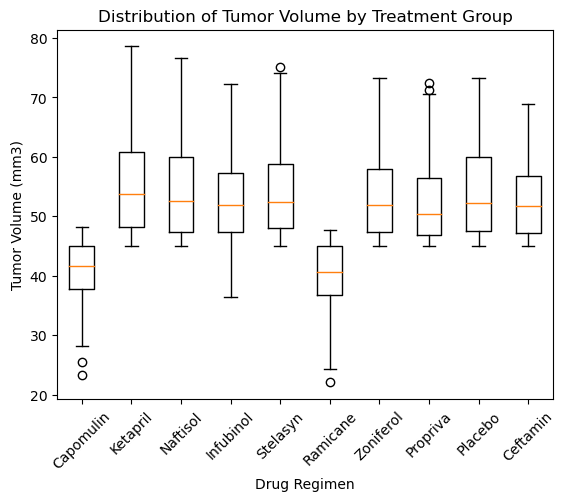

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the title and labels for the box plot
ax.set_title("Distribution of Tumor Volume by Treatment Group")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")

# Create the box plot using the tumor volume data for each treatment group
ax.boxplot(tumor_vol_data, labels=treatments)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()



#TIME PERMITTING - MATCH EXAMPLE OUTPUT 

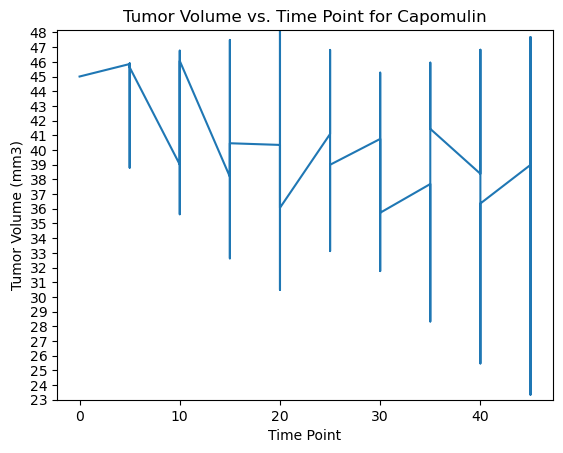

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter the data for the Capomulin regimen
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']

# Create the line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

# Set the title and labels for the plot
plt.title('Tumor Volume vs. Time Point for Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Determine the y-axis limits based on the range of tumor volumes
y_min = capomulin_data['Tumor Volume (mm3)'].min()
y_max = capomulin_data['Tumor Volume (mm3)'].max()

# Set the y-axis limits and ticks
plt.ylim(y_min, y_max)
plt.yticks(range(int(y_min), int(y_max) + 1))

# Display the plot
plt.show()


#TIME PERMITTING - MATCH EXAMPLE OUTPUT 
# x_axis_data = np.arange(1,13,1)
# x_axis_data
# plt.plot(x_axis_data, points_C)
# plt.show()



#TIME PERMITTING - MATCH EXAMPLE OUTPUT

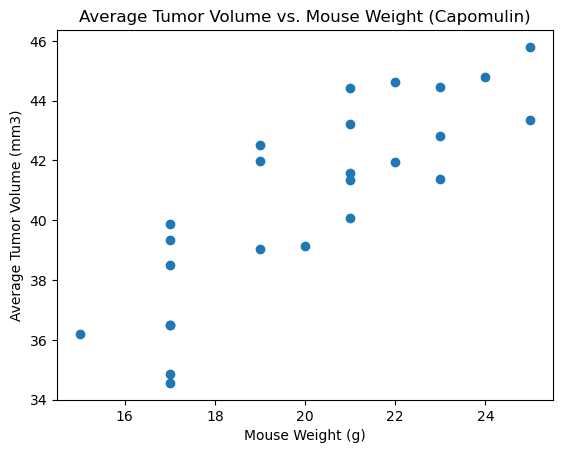

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume)

# Set the title and labels for the plot
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

# plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black", s=scoop_price)
# plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.7088568047708723


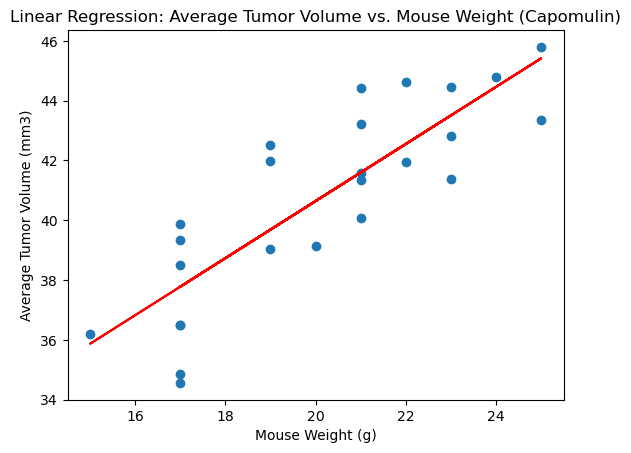

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Add regression line, run the scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, average_tumor_volume)
regress_values = mouse_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(mouse_weights,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Linear Regression: Average Tumor Volume vs. Mouse Weight (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is: {rvalue**2}")
plt.show()